In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#chaaning Sex to numeric values
titanic_data = titanic_data.replace(['female'], 1)
titanic_data = titanic_data.replace(['male'], 0)
titanic_data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<AxesSubplot: >

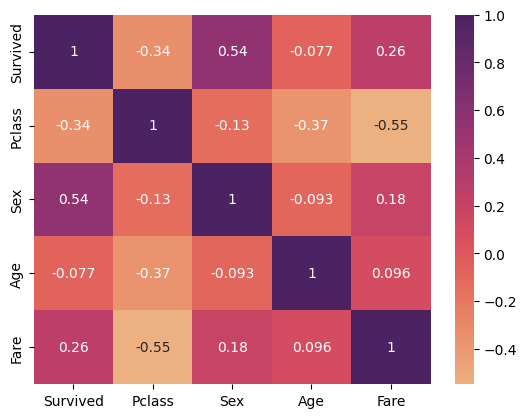

In [4]:
# Step 1: Create a heatmap showing the correlation between the
# following features: survival, pclass, sex, age, and fare 

titanic_features = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
corr_heatmap = sns.heatmap(titanic_features.corr(), annot = True, cmap = 'flare')
corr_heatmap

<AxesSubplot: xlabel='groups', ylabel='count'>

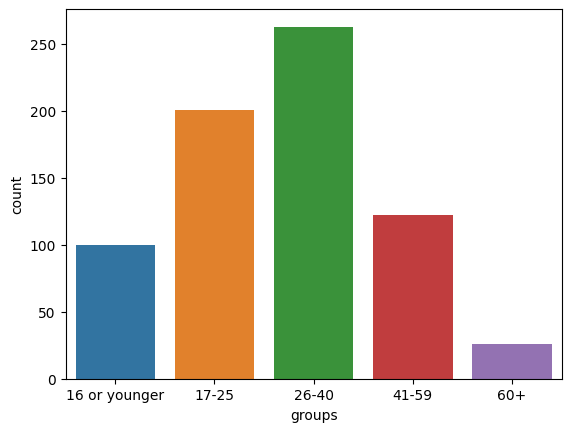

In [5]:
# Step 2: Create a bar graph that illustrates how many passengers
# fell into each of these age ranges: 0 - 16, 17 - 25, 26 -40, 41 - 59, 60 or older

#length of each age filter
btween_0_16 = len(titanic_data [(titanic_data["Age"] <= 16)])
btween_17_25 = len(titanic_data [(titanic_data["Age"] >= 17) & (titanic_data["Age"] <= 25)])
btween_26_40 = len(titanic_data[(titanic_data["Age"] >= 26) & (titanic_data["Age"] <= 40)])
btween_41_59 = len(titanic_data[(titanic_data["Age"] >= 41) & (titanic_data["Age"] <= 59)])
btween_60_up = len(titanic_data[titanic_data["Age"] >= 60])

#lists of data for dict
ages = ['16 or younger','17-25','26-40', '41-59', '60+']
filtered_ages = [btween_0_16, btween_17_25, btween_26_40, btween_41_59, btween_60_up]

#dict
age_groups = {
    'groups': ages,
    'count': filtered_ages
}
vis_df = pd.DataFrame(age_groups)
sns.barplot(data = vis_df, x = 'groups', y = 'count', errorbar = None)



In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

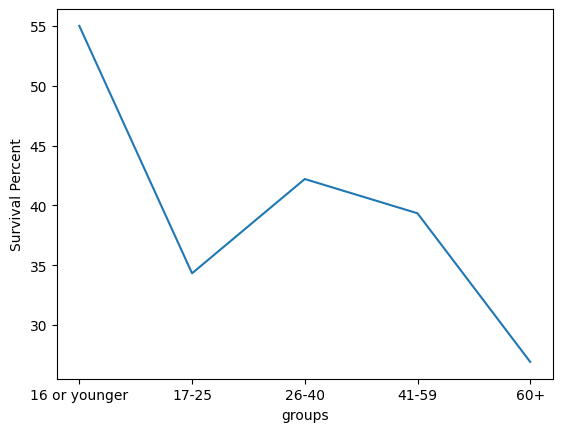

In [7]:
# Step 3: Create a line graph showing the average survival percentage
# of each of the previous age groups

#length of each list of filtered ages
len_btween_0_16 = len(titanic_data[(titanic_data["Age"] <= 16)])
len_btween_17_25 = len(titanic_data[(titanic_data["Age"] >= 17) & (titanic_data["Age"] <= 25)])
len_btween_26_40 = len(titanic_data[(titanic_data["Age"] >= 26) & (titanic_data["Age"] <= 40)])
len_btween_41_59 = len(titanic_data[(titanic_data["Age"] >= 41) & (titanic_data["Age"] <= 59)])
len_btween_60_up = len(titanic_data[titanic_data["Age"] >= 60])

#Survived within age filter
btween_0_16_survived = len(titanic_data[(titanic_data["Age"] <= 16) & (titanic_data["Survived"] == 1)])
btween_17_25_survived = len(titanic_data[(titanic_data["Age"] >= 17) & (titanic_data["Age"] <= 25)  & (titanic_data["Survived"] == 1)])
btween_26_40_survived = len(titanic_data[(titanic_data["Age"] >= 26) & (titanic_data["Age"] <= 40)  & (titanic_data["Survived"] == 1)])
btween_41_59_survived = len(titanic_data[(titanic_data["Age"] >= 41) & (titanic_data["Age"] <= 59)  & (titanic_data["Survived"] == 1)])
btween_60_up_survived = len(titanic_data[(titanic_data["Age"] >= 60)  & (titanic_data["Survived"] == 1)])

#Percentage of survival
btween_0_16_percent =  btween_0_16_survived/len_btween_0_16*100
btween_17_25_percent = btween_17_25_survived/len_btween_17_25*100
btween_26_40_percent = btween_26_40_survived/len_btween_26_40*100
btween_41_59_percent = btween_41_59_survived/len_btween_41_59*100
btween_60_up_percent = btween_60_up_survived/len_btween_60_up*100
ages = ['16 or younger','17-25','26-40', '41-59', '60+']
percents = [btween_0_16_percent, btween_17_25_percent, btween_26_40_percent, btween_41_59_percent, btween_60_up_percent]
age_groups = { #dict of lists
    'groups': ages, 
    'Survival Percent': percents
}

data_plot = pd.DataFrame(age_groups)

sns.lineplot(data = data_plot, x = "groups", y = "Survival Percent", )
plt.show()

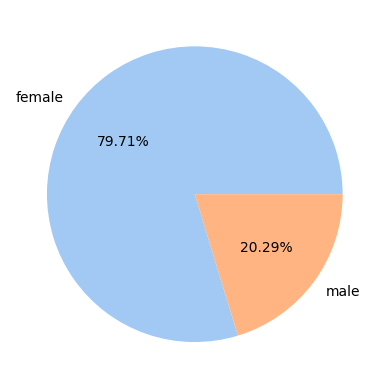

In [8]:
# Step 4: Create a pie chart that shows the percentage
# of survivors that were male and the percentage of survivors that were female

#format:
    #sex total
    #sex filter w/ survived
    #sex survival percentage
fem_total = len(titanic_data[titanic_data["Sex"] == 1])
fem_survive = len(titanic_data[(titanic_data["Sex"] == 1) & (titanic_data["Survived"] == 1)])
fem_percent = str(fem_survive/fem_total*100)
male_total = len(titanic_data[titanic_data["Sex"] == 0])
male_survive = len(titanic_data[(titanic_data["Sex"] == 0) & (titanic_data["Survived"] == 1)])
male_percent = str(male_survive/male_total*100)

#list of axes
percents = [
    fem_percent,
    male_percent
]
labels_gender = [
    "female",
    "male"
]
colors = sns.color_palette('pastel')[0:5]
plt.pie(labels = labels_gender, x = percents, colors = colors, autopct="%.2f%%")
plt.show()

<AxesSubplot: >

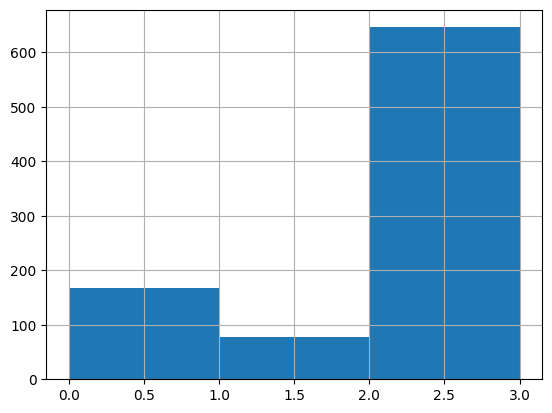

In [12]:
# Step 5: Create a histogram that shows the distribution
# of passengers between the three embarking locations: 
# C (Cherbourg)[represented by 0], Q (Queenstown)[represented by 1], S (Southampton)[represented by 2]

embark_num = []

for _ , row in titanic_data.iterrows():
    
    if row["Embarked"] == "C":
        embark_num.append(0)
        
    if row["Embarked"] == "Q":
        embark_num.append(1)
        
    if row["Embarked"] == "S":
        embark_num.append(2)
        
    if pd.isna(row["Embarked"]):
        embark_num.append(3)
        
titanic_data["embarked"] = embark_num   
titanic_data['embarked'].hist(bins=3)